In [1]:
import swarms
from numpy import linspace, logspace, pi, array
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df = pd.read_csv("../GPIMdwarfs.csv", index_col=0)
df

,S_Type,Distance_distance,FLUX_I,FLUX_H,Fe_H_Teff,Class,subtype,Mass,Lum,contrast_thresh
45,M1V,27.1928,NaN,7.561,3849,M,1,0.49,0.0350,3.000000e-06
59,M0Ve,48.7648,NaN,7.361,3208,M,0,0.60,0.0720,3.000000e-06
69,M1Ve,19.5600,8.372,6.578,3792,M,1,0.49,0.0350,2.000000e-06
83,M3.0V,16.8022,9.098,7.174,3584,M,3,0.36,0.0150,3.000000e-06
109,M3.3V,15.8328,9.100,7.146,3412,M,3,0.36,0.0150,3.000000e-06
110,M3Ve+M4Ve,11.1100,8.151,NaN,0,M,3,0.36,0.0150,2.000000e-06
114,M0Ve,26.9008,8.177,6.429,4048,M,0,0.60,0.0720,2.000000e-06
151,M1Ve,22.4041,9.337,7.280,3652,M,1,0.49,0.0350,3.000000e-06
193,M0.0Ve,15.0578,7.777,6.092,3940,M,0,0.60,0.0720,7.000000e-07
198,M4.0Ve,5.9874,8.263,6.005,3242,M,4,0.20,0.0055,2.000000e-06


In [7]:
AU = 1.496e11
pc = 3.086e16
Msun = 1.989e30
Lsun = 3.828e26
Mmoon = 7.35e22

RHO=1500 
eta = 0.4; Nstr = 6.; Dt = 100.; Dmax = 150000.; R_pl = 6.9911e7
lamb = 1.65e-6

time = [1e7, 3e7, 1e8]
M_jup = [(1./10.)*1.89587112e27, (1./3.)*1.89587112e27, (1.)*1.89587112e27, (3.)*1.89587112e27]
M0 = 1 * Mmoon

In [8]:
def Fstar(Ls, Bnu, Ts, dpl):
    sig = 5.670367e-8 #Stefan-Boltzmann constant
    part1 = Ls * Bnu
    part2 = 4 * sig * Ts ** 4 * dpl ** 2
    return part1 / part2

In [12]:
star = df.iloc[3] # could do for i in range(24): star = Mdwarfs.iloc[i]
star

S_Type                 M3.0V
Distance_distance    16.8022
FLUX_I                 9.098
FLUX_H                 7.174
Fe_H_Teff               3584
Class                      M
subtype                    3
Mass                    0.36
Lum                    0.015
contrast_thresh        3e-06
Name: 83, dtype: object

<Figure size 432x288 with 0 Axes>

/Users/dtamayo/miniconda3/envs/p3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


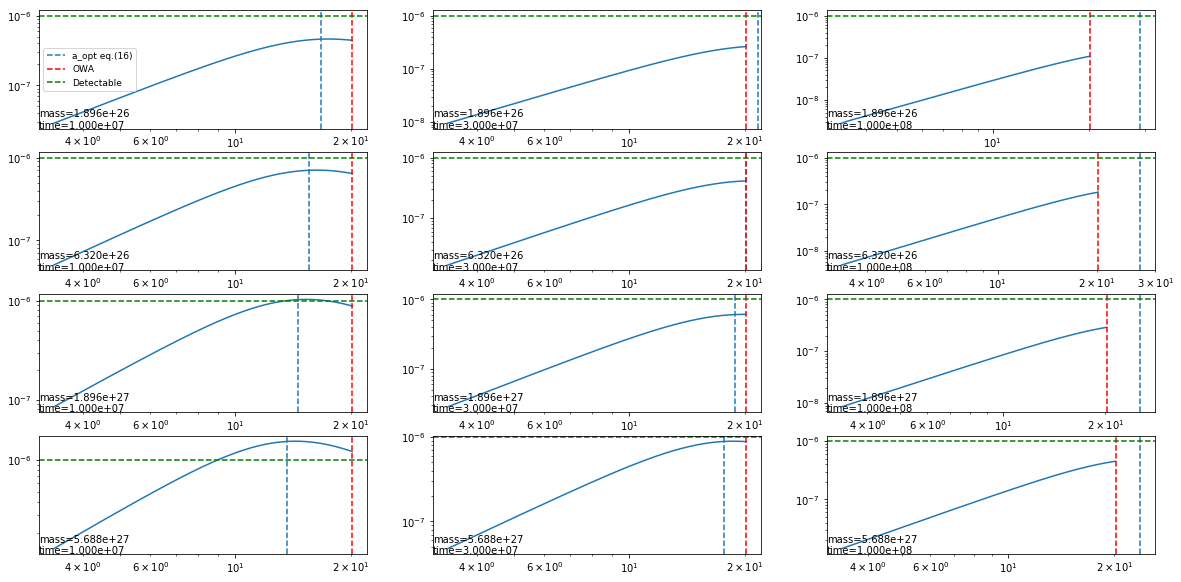

In [14]:
M_s = star['Mass'] * Msun
L_s = star['Lum'] * Lsun
T_star = star['Fe_H_Teff']
d_pl = star['Distance_distance'] * pc
contrast_thresh = 1.e-6#star['contrast_thresh'] # This is the rough contrast threshold I interpolated by eye using the I band magnitude and the GPI contrast ratio figure on their website.

GPIIWA = 0.2 # GPI inner working angle in arcsec
GPIOWA = 1.2 # Outer working angle

# Convert the inner and outer working angles into AU, using the distance to the system
a_plv = linspace(GPIIWA*d_pl/pc * AU, GPIOWA*d_pl/pc * AU, 500)

plt.figure(1)
fig, axes = plt.subplots(len(M_jup), len(time), subplot_kw=dict(), figsize=(20, 10))
for w in range(len(M_jup)):
    for k in range(len(time)):    
        
        fth_list = []
        fs_list = []
        for i in range(len(a_plv)):

            s = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_jup[w], a_plv[i], R_pl, eta, Nstr,
                        d_pl, correction=True, alpha=1.2)

            s.updateSwarm(time[k])
            B_nu_list = s.computeBmu(array([lamb]), T_star)
            F_star = Fstar(L_s, B_nu_list, T_star, d_pl)/1e-26

            f_vrel = 4/pi
            Qd = s.computeQd(s.Dc)
            part1 = (M_s/1.989e30)**0.33 * f_vrel**0.55
            part2 = (M_jup[w]/5.972e24)**0.06 * Qd**0.15 * eta
            part3 = time[k] * (M0/5.972e24) / (RHO * (s.Dc/1000)) 

            a_opt = 50 * part1 / part2 * part3**0.24 
            
            
            s2 = swarms.CollSwarm(M0, Dt, Dmax, L_s, M_s, M_jup[w],
                                    a_plv[i], R_pl, eta, Nstr, d_pl,
                                    rho=RHO, fQ=5, f_vrel=4/pi,
                                    correction=True, alpha=1.2)

            s2.updateSwarm(time[k])

            F_th = s2.computeFth(array([lamb]), swarm=True)
            F_s = s2.computeFs(array([lamb]), 0.32, 0.08, swarm=True)

            fth_list.append(F_th[0]/1e-26)
            fs_list.append(F_s[0]/1e-26)

        contrast_ratio_apl_th = array(fth_list) / F_star
        contrast_ratio_apl_s = array(fs_list) / F_star

        axes[w, k].loglog(a_plv/AU, contrast_ratio_apl_s)
        axes[w, k].axvline(a_opt, ls='--',label="a_opt eq.(16)")
        axes[w, k].axvline(a_plv[-1]/AU, color='r', ls='--',label="OWA")
        axes[w, k].axhline(contrast_thresh, color='g', ls='--',label="Detectable")
        axes[w, k].text(0, 0, 'mass={0:.3e}'.format(M_jup[w])+'\n'+'time={0:.3e}'.format(time[k]), transform=axes[w, k].transAxes) 
        if w == 0 and k == 0:
            axes[w, k].legend(prop={'size': 9})
            #axes[w, k].xlabel("a_pl [au]")
            #axes[w, k].ylabel("F_swarm / F_star")
plt.show()